<a href="https://colab.research.google.com/github/chomijeong/PythonProject.github.io/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EC%98%81%ED%99%94_%ED%8F%89%EC%A0%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get -qq install -y fonts-nanum

Selecting previously unselected package fonts-nanum.
(Reading database ... 126109 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [4]:
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter

In [6]:
movie_path = "/content/IMDB top 1000.csv"

data_list = []
with open(movie_path, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
        data_list.append(row)

data_array = np.array(data_list)

title_idx = header.index("Title")
genre_idx = header.index("Genre")
rate_idx = header.index("Rate")

selected_data = data_array[:, [title_idx, genre_idx, rate_idx]]

filtered_data = selected_data[~np.any(selected_data == '', axis=1)]
print("-"*120)

------------------------------------------------------------------------------------------------------------------------


In [7]:
print("⭐ Numpy 배열 형태의 데이터 샘플 ")
print(filtered_data)

print("데이터 크기 : ", filtered_data.shape)

print("-"*120)

⭐ Numpy 배열 형태의 데이터 샘플 
[['1. The Shawshank Redemption (1994)' 'Drama' '9.3']
 ['2. The Godfather (1972)' 'Crime, Drama' '9.2']
 ['3. The Dark Knight (2008)' 'Action, Crime, Drama' '9.0']
 ...
 ['400. JFK (1991)' 'Drama, History, Thriller' '8.0']
 ['301. Nights of Cabiria (1957)' 'Drama' '8.1']
 ['302. Throne of Blood (1957)' 'Drama, History' '8.1']]
데이터 크기 :  (1000, 3)
------------------------------------------------------------------------------------------------------------------------


In [8]:
x = filtered_data[:,2].astype(float)
print(f"총 영화의 개수 : ", filtered_data.shape[0])
print(f"평점 평균 :  {np.mean(x):.1f}")
print(f"최고 평점 : ", np.max(x))
print(f"최저 평점 : ", np.min(x))

print("-"*120)

총 영화의 개수 :  1000
평점 평균 :  8.1
최고 평점 :  9.3
최저 평점 :  8.0
------------------------------------------------------------------------------------------------------------------------


In [10]:
max_rating = np.max(x)
max_rating_movie = filtered_data[x == max_rating]
print("⭐ 최고 평점 영화 목록 :")
for movie in max_rating_movie:
    print(f"{movie[0][2:]} - 평점 : {movie[2]}")

Genre_column = data_array[:, genre_idx]

all_genres = set()
for genres in Genre_column:
    all_genres.update([g.strip() for g in genres.split(',')])

print("-"*120)

⭐ 최고 평점 영화 목록 :
 The Shawshank Redemption (1994) - 평점 : 9.3
------------------------------------------------------------------------------------------------------------------------


In [11]:
print("⭐ 장르별 평균 평점 :")

for genre in all_genres:
    filtered_ratings = data_array[[genre in g for g in Genre_column], rate_idx].astype(float)
    average_rating = np.mean(filtered_ratings)
    print(f"{genre} : {average_rating:.1f}")

print("-"*120)

⭐ 장르별 평균 평점 :
Sport : 8.2
Western : 8.4
Fantasy : 8.1
Comedy : 8.1
History : 8.1
Biography : 8.1
Musical : 8.1
War : 8.2
Family : 8.2
Film-Noir : 8.1
Action : 8.1
Drama : 8.1
Animation : 8.1
Crime : 8.1
Mystery : 8.1
Music : 8.1
Thriller : 8.1
Sci-Fi : 8.1
Adventure : 8.1
Horror : 8.2
Romance : 8.1
------------------------------------------------------------------------------------------------------------------------


In [12]:
# 연도별 평점 변화 분석
Released_Year_dict = {}

for movie in filtered_data:
    Released_Year = movie[0][-5:-1]
    if Released_Year not in Released_Year_dict:
        Released_Year_dict[Released_Year] = []
    Released_Year_dict[Released_Year].append(float(movie[2]))

Released_Year_avg_ratings = {Released_Year: np.mean(rates) for Released_Year, rates in Released_Year_dict.items()}
sorted_Released_Years = sorted(Released_Year_avg_ratings.items(), key=lambda x: int(x[0]))
print("⭐ 연도별 평균 평점 :")
for Released_Year, avg_rating in sorted_Released_Years:
    print(f"{Released_Year}: {avg_rating:.1f}")


print("-"*120)

⭐ 연도별 평균 평점 :
1920: 8.1
1921: 8.3
1924: 8.2
1925: 8.2
1926: 8.1
1927: 8.1
1928: 8.1
1931: 8.4
1934: 8.1
1936: 8.5
1937: 8.1
1939: 8.1
1940: 8.1
1941: 8.3
1942: 8.3
1944: 8.3
1946: 8.6
1948: 8.1
1949: 8.1
1950: 8.3
1951: 8.1
1952: 8.3
1953: 8.1
1954: 8.2
1955: 8.2
1957: 8.2
1958: 8.2
1959: 8.2
1960: 8.2
1961: 8.2
1962: 8.2
1963: 8.3
1964: 8.4
1965: 8.3
1966: 8.3
1967: 8.1
1968: 8.4
1971: 8.4
1972: 8.5
1973: 8.2
1974: 8.6
1975: 8.3
1976: 8.2
1977: 8.6
1978: 8.1
1979: 8.3
1980: 8.3
1981: 8.4
1982: 8.1
1983: 8.3
1984: 8.2
1985: 8.3
1986: 8.2
1987: 8.2
1988: 8.3
1989: 8.1
1990: 8.7
1991: 8.1
1992: 8.0
1993: 8.0
1994: 8.6
1995: 8.1
1996: 8.0
1997: 8.1
1998: 8.1
1999: 8.1
2000: 8.1
2001: 8.1
2002: 8.2
2003: 8.0
2004: 8.0
2005: 8.1
2006: 8.1
2007: 8.0
2008: 8.1
2009: 8.0
2010: 8.1
2011: 8.1
2012: 8.1
2013: 8.0
2014: 8.1
2015: 8.0
2016: 8.0
2017: 8.1
2018: 8.1
2019: 8.1
2020: 8.7
--------------------------------------------------------------------------------------------------------------------

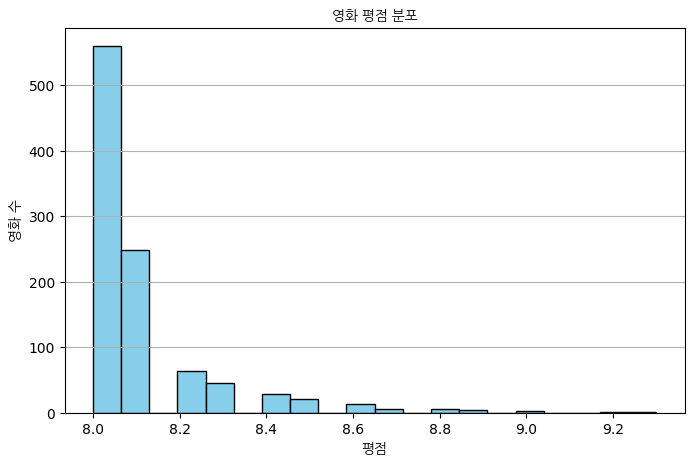

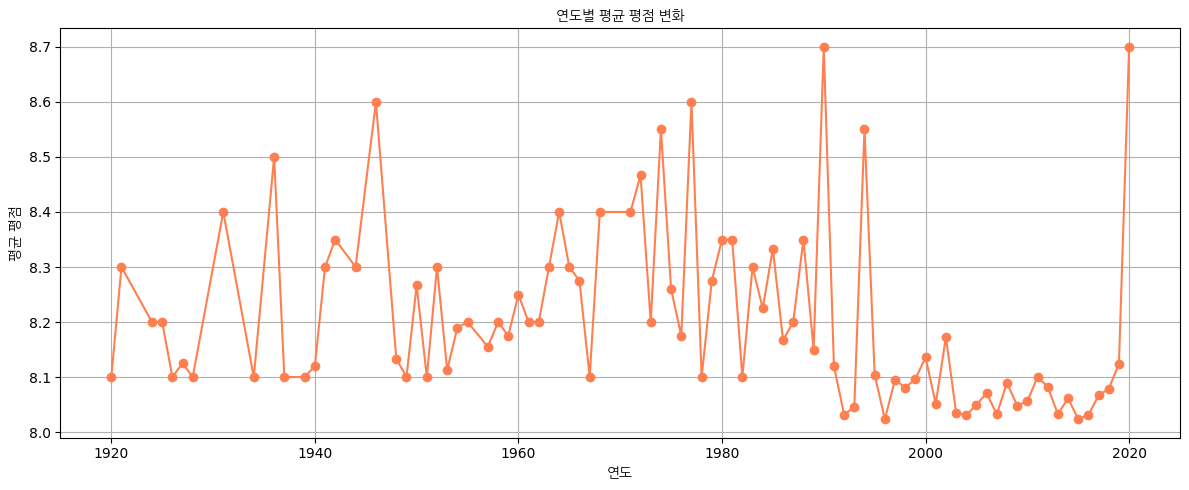

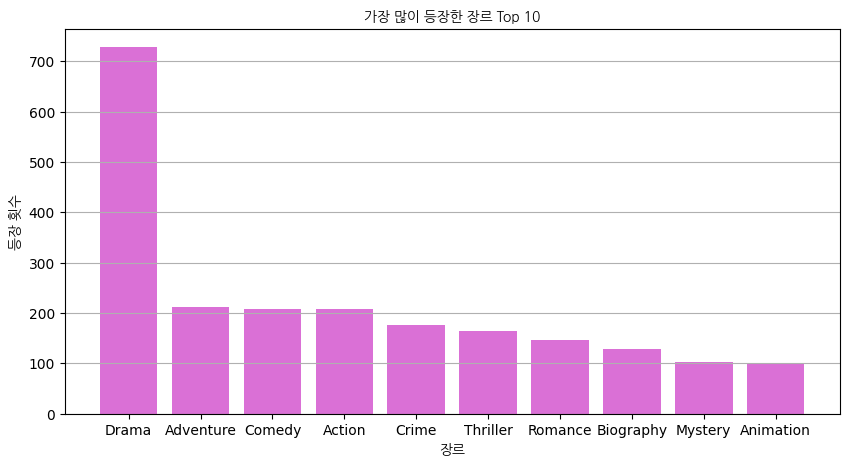

In [13]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 평점 분포
plt.figure(figsize=(8, 5))
plt.hist(x, bins=20, color='skyblue', edgecolor='black')
plt.title("영화 평점 분포", fontproperties=font_prop)
plt.xlabel("평점", fontproperties=font_prop)
plt.ylabel("영화 수", fontproperties=font_prop)
plt.grid(axis='y')
plt.show()

# 연도별 평균 평점 변화
years = [int(year) for year, _ in sorted_Released_Years]
avg_ratings = [rating for _, rating in sorted_Released_Years]

plt.figure(figsize=(12, 5))
plt.plot(years, avg_ratings, marker='o', color='coral')
plt.title("연도별 평균 평점 변화", fontproperties=font_prop)
plt.xlabel("연도", fontproperties=font_prop)
plt.ylabel("평균 평점", fontproperties=font_prop)
plt.grid(True)
plt.tight_layout()
plt.show()

# 장르 빈도
all_genre_list = []
for genres in Genre_column:
    all_genre_list.extend([g.strip() for g in genres.split(',')])

genre_counts = Counter(all_genre_list)
top_genres = genre_counts.most_common(10)

plt.figure(figsize=(10, 5))
plt.bar([g[0] for g in top_genres], [g[1] for g in top_genres], color='orchid')
plt.title("가장 많이 등장한 장르 Top 10", fontproperties=font_prop)
plt.xlabel("장르", fontproperties=font_prop)
plt.ylabel("등장 횟수", fontproperties=font_prop)
plt.grid(axis='y')
plt.show()